Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 06: Dimension Reduction

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, June 1, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Useful python methods

* For K-Means
    * [scipy.cluster.vq.vq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.vq.html)
    * [scipy.cluster.vq.kmeans](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html)
* For PCA    
    * [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* To plot arrows
    * [matplotlib.pyplot.quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)
* Numpy
    * [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean)
    * [@ / np.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul)
    * [np.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std)
    * [np.divide](https://numpy.org/doc/stable/reference/generated/numpy.divide.html?highlight=divide)
         * The `where` parameter can be used to only divide were the divisor is nonzero. The `out` parameter has to be used then as well.
    * [.T / np.transpose](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html#numpy.transpose)

## Assignment 1: Covariance and correlation matrix [5 Points]

**a)** Recap: What is the covariance matrix? What do the different entries of the matrix mean?

tells us how variables are interrelated

different entries mean relation between variable_row and variable_col

**b)** Calculate the covariance and correlation matrices for the given dataset.

|    |  feature x  |  feature y  |
|-------|------|-----|
| **sample A** |  2 | 3 |
| **sample B** | 4 | 7 |


In [ ]:
#var = ((-1)*(-2) + 1 * 2)/2 (oder 1?) = 2
#std = sqrt(2)

Cov = M * M^T / N

|    |  A |  B  |
|-------|------|-----|
| A |  6.5 | 14.5 |
| B | 14.5 | 32.5 |

Cor = sqrt(2) * Cov

**c)** Execute the next cell. You can see three data sets. Which of the three covariance matrices below belongs to which plot?

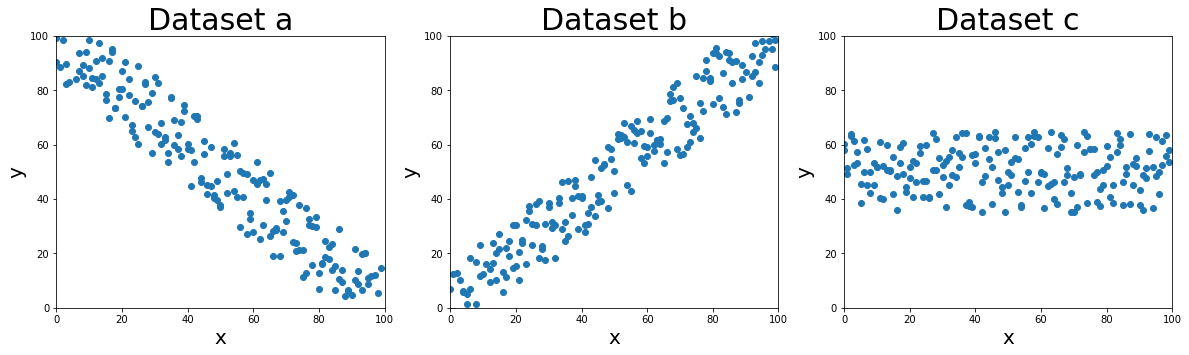

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,5))
factors = [-1,1,0]
names = ["a", "b", "c"]
datasets = []
for i, factor in enumerate(factors):
    x = np.array(np.arange(100).tolist() + np.arange(100).tolist())
    if factor!=0:
        y = x * factor + (np.random.rand(len(x))-0.5)*30 + (50-50*(factor))
    else:
        y = np.array([50 for _ in range(len(x))]) + (np.random.rand(len(x))-0.5)*30
    plt.subplot(1,len(factors),i+1)
    plt.scatter(x,y)
    plt.title("Dataset "+names[i], fontsize = 30)
    plt.xlabel("x", fontsize = 20)
    plt.ylabel("y", fontsize = 20)
    plt.ylim(0, 100)
    plt.xlim(0, 100)
    datasets.append(np.stack([x, y], axis = 1))
plt.show()

**Covariance matrix I:**

| C1    |  x  |  y  |
|-------|-----|-----|
| **x** | 837 | -856 |
| **y** | -856 | 951 |

**Covariance matrix II:**

 | C2 | x | y |
 | ---|---|---|
 |   **x** |  837 | 8  |
 |   **y** | 8  |  65 |


**Covariance matrix III:**

| C3 | x | y |
| ---|---|---|
|   **x** |  837 | 828  |
|   **y**| 828  |  900 |


C1 - a C2 - c C3 - b

**d) Implement the formula for the correlation matrix [1 Point]**

A general formula for the correlation matrix is
$$ A = \frac{1}{n-1}\frac{(\bf{X}-\bar{x})^T(\bf{X}-\bar{x})}{{\boldsymbol{\sigma^T}}{\boldsymbol{\sigma}}}$$

Were $\bf{X}$ is the dataset with the datapoints as rows, $\bf{\bar{x}}$ is the row vector of feature means, $\boldsymbol{\sigma}$ is the row vector of standard deviations, and the large fraction bar stands for pointwise division.

We can better understand the formula with an example dataset $\bf{X}$ with three datapoints and two features $x$ and $y$. Then with $\bf{\bar{x}} = (\mu_x, \mu_y)$ and $\boldsymbol{\sigma} = (\sigma_x, \sigma_y)$ the formula becomes:

$$ A = \frac{1}{n-1} \frac{\begin{bmatrix}
    (x_1-\mu_x) & (x_2-\mu_x) & (x_3-\mu_x)\\
    (y_1-\mu_y) & (y_2-\mu_y) & (y_3-\mu_y)
        \end{bmatrix}\times\begin{bmatrix}
    (x_1-\mu_x) & (y_1-\mu_y)\\
    (x_2-\mu_x) & (y_2-\mu_y)\\
    (x_3-\mu_x) & (y_3-\mu_y)
        \end{bmatrix}}{\begin{bmatrix}
    \sigma_x\sigma_x & \sigma_x\sigma_y\\
    \sigma_y\sigma_x & \sigma_y\sigma_y
    \end{bmatrix}}
$$

This will evalute to the normal definition for the 2D case:
$$A =
\begin{bmatrix}
    corr(x,x) & corr(x,y) \\
    corr(y,x) & corr(y,y)
\end{bmatrix}$$

with
$$corr(x,y) = \frac{cov(x,y)}{\sigma_x\sigma_y}$$

and
$$cov(x,y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\mu_x)(y_i-\mu_y)$$

where $x_i$ is the value for feature $x$ of the $i$th datapoint, $\mu_x$ the mean of feature $x$ and $\sigma_x$ the standard deviation of feature $x$.

Now implement the general formula above.


Make sure to make your implementation work for more than two dimensional data as well!

Then execute the cell below which shows the correlation matrices for the datasets of task c.

In [2]:
%matplotlib inline
def correlation(data):
    """
    Input is an array of the form number_data * dimensions
    An example is shown when this cell is executed
    """
    # YOUR CODE HERE
    # YOUR CODE HERE


## DELETE COMMENTS TO SHOW THE DATA USED FOR ASSERTION
#example_x = [2,2,2]
#example_y = [1,2,3]
#example_data = np.stack([[1,2,3], [2,2,2]], axis=1)
#plt.scatter(example_x, example_y)
#plt.show()

test_data1 = np.stack([[1,2,3], [2,2,2]], axis=1)
cor1 = correlation(test_data1)
real_cor1 = [[1.0, 0.0], [0.0, 0.0]]

test_data2 = np.stack([[1,2,3], [4,5,6]], axis=1)
cor2 = correlation(test_data2)
real_cor2 = [[1,1], [1,1]]

assert np.allclose(cor1, real_cor1), "Wrong output: correlation should be \n {} \n for this data, is \n {}".format(real_cor1, cor1)
assert np.allclose(cor2, real_cor2), "Wrong output: correlation should be \n {} \n for this data, is \n {}".format(real_cor2, cor2)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# the data of task c is saved in a list called datasets
for i, d in enumerate(datasets):
    print("Correlation matrix for data set", names[i], "\n", correlation(d), "\n")

**e)** What is the difference between the correlation matrix and covariance matrix? Do you have an idea when to use which for PCA?

Covariance / std = correlation mat

If you want to scale everything to 1 in PCA, use Correlation matrix.

## Assignment 2: Local PCA (5 Points)

In the lecture we learned that regular PCA is ill suited for special cases of data. In this assignment we will take a look at local PCA which is used for clustered data (ML-06, Slide 25). This is mostly a repetition of algorithms we already used. Feel free to use the built-in functions for k-means clustering and PCA from the libraries (we already included the right imports to set you on track).

<IPython.core.display.Javascript object>


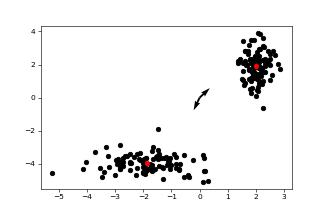

[[ 2.0107588   1.88443575]
 [-1.87175128 -3.97618083]]
[[ 0.55227845  0.83365971]
 [ 0.83365971 -0.55227845]]
[2.47103556e+01 8.10429521e-32]


In [29]:
%matplotlib notebook

import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

from numpy.random import multivariate_normal as multNorm

from scipy.cluster.vq import kmeans, vq
from sklearn.decomposition import PCA

np.random.seed(42)

# Generate clustered data - you may plot the data to take a look at it
data = np.vstack((multNorm([2, 2], [[0.1, 0], [0, 1]], 100),
                  multNorm([-2, -4], [[1, 0], [0, 0.3]], 100)))
plt.plot(data[:,0], data[:,1],'o', color='black')
# TODO: Apply k-means to the data.
k = kmeans(data, 2)[0]
# TODO: Apply PCA for each cluster and store each two largest components.
# Perform PCA
print(k)


pca = PCA()
pca.fit(k)

eigenvecs = pca.components_
eigenvals = pca.explained_variance_
print(eigenvecs)
print(eigenvals)



# TODO: Plot the results of k-means and local PCA
plt.quiver(0, 0, k[0][0], k[0][1])
plt.quiver(0, 0, k[1][0], k[1][1])
plt.plot(k[:,0], k[:,1],'o', color='red')

## Assignment 3: Data Visualization and Chernoff Faces (3 Points)

The following exercise contains no programming (unless you want to go through the implementation). Answer the questions that are posted below the code segment (and run the code before - it's really worth it!). In case you are even more interested - here is a link to the [original paper](http://www.dtic.mil/cgi-bin/GetTRDoc?AD=AD0738473).

In [ ]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Arc
from numpy.random import rand
import numpy as np

def cface(ax, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18):
    """
    This implementation of chernov faces is taken from Abraham Flaxman. You can
    find the original source files here: https://gist.github.com/aflaxman/4043086
    Only minor adjustments have been made.

     x1 = height  of upper face
     x2 = overlap of lower face
     x3 = half of vertical size of face
     x4 = width of upper face
     x5 = width of lower face
     x6 = length of nose
     x7 = vertical position of mouth
     x8 = curvature of mouth
     x9 = width of mouth
     x10 = vertical position of eyes
     x11 = separation of eyes
     x12 = slant of eyes
     x13 = eccentricity of eyes
     x14 = size of eyes
     x15 = position of pupils
     x16 = vertical position of eyebrows
     x17 = slant of eyebrows
     x18 = size of eyebrows
    """

    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9 * (x3 - .5)
    x4 = (x4 + .25)
    x5 = (x5 + .2)
    x6 = .3 * (x6 + .01)
    x8 = 5 * (x8 + .001)
    x11 /= 5
    x12 = 2 * (x12 - .5)
    x13 += .05
    x14 += .1
    x15 = .5 * (x15 - .5)
    x16 = .25 * x16
    x17 = .5 * (x17 - .5)
    x18 = .5 * (x18 + .1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = Ellipse((0, (x1 + x3) / 2), 2 * x4, (x1 - x3), ec='black', linewidth=2)
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = Ellipse((0, (-x1 + x2 + x3) / 2), 2 * x5, (x1 + x2 + x3), fc='white', ec='black', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = Ellipse((0, (x1 + x3) / 2), 2 * x4, (x1 - x3), fc='white', ec='none')
    ax.add_artist(e)
    e = Ellipse((0, (-x1 + x2 + x3) / 2), 2 * x5, (x1 + x2 + x3), fc='white', ec='none')
    ax.add_artist(e)

    # draw nose
    plt.plot([0, 0], [-x6 / 2, x6 / 2], 'k')

    # draw mouth
    p = Arc((0, -x7 + .5 / x8), 1 / x8, 1 / x8, theta1=270 - 180 / np.pi * np.arctan(x8 * x9),
            theta2=270 + 180 / np.pi * np.arctan(x8 * x9))
    ax.add_artist(p)

    # draw eyes
    p = Ellipse((-x11 - x14 / 2, x10), x14, x13 * x14, angle=-180 / np.pi * x12, fc='white', ec='black')
    ax.add_artist(p)

    p = Ellipse((x11 + x14 / 2, x10), x14, x13 * x14, angle=180 / np.pi * x12, fc='white', ec='black')
    ax.add_artist(p)

    # draw pupils
    p = Ellipse((-x11 - x14 / 2 - x15 * x14 / 2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = Ellipse((x11 + x14 / 2 - x15 * x14 / 2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)

    # draw eyebrows
    ax.plot([-x11 - x14 / 2 - x14 * x18 / 2, -x11 - x14 / 2 + x14 * x18 / 2],
            [x10 + x13 * x14 * (x16 + x17), x10 + x13 * x14 * (x16 - x17)], 'k')
    ax.plot([x11 + x14 / 2 + x14 * x18 / 2, x11 + x14 / 2 - x14 * x18 / 2],
            [x10 + x13 * x14 * (x16 + x17), x10 + x13 * x14 * (x16 - x17)], 'k')


fig, axes = plt.subplots(nrows=5, ncols=5, num='Chernoff Faces', figsize=(9, 9))
for ax in axes.flat:
    cface(ax, .9, *rand(17))
    ax.axis([-1.2, 1.2, -1.2, 1.2])
    ax.set(xticks=[], yticks=[])

fig.subplots_adjust(hspace=0, wspace=0)


### a) Data Visualization Techniques

Why do we need data visualization techniques and what are techniques to visualize high dimensional data?

YOUR ANSWER HERE

### b) Chernoff faces

Why did Chernoff use faces for his representation? Why not something else, like dogs or houses?

YOUR ANSWER HERE

### c) Alternatives

Explain at least one other data visualization technique from the lecture.

YOUR ANSWER HERE